In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import math
import copy
from plotBoundary import *
import pylab as pl
%matplotlib inline

In [2]:
plt.style.use('fivethirtyeight')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['figure.autolayout'] = 'true'

In [3]:
train = np.loadtxt('data/data3_train.csv')
X = train[:,0:2]
Y = train[:,2:3]

In [6]:
def run_pegasos(gamma, threshold=1e-5):
    alpha = np.zeros(len(X))
    prev = copy(alpha)
    L = 0.02
    step_size = 1e-1
    max_epochs = 1000
    t = 0
    K = get_kernel(X, gamma)
    for epoch in range(max_epochs):
        for i in range(len(X)):
            t += 1
            step_size = 1/(t*L)
            alpha[i] *= 1-step_size*L
            if Y[i]*(alpha.dot(K[i])) < 1:
                alpha[i] += step_size*Y[i]
        #print np.linalg.norm(alpha)
        if np.linalg.norm(alpha-prev) < threshold:
            break
        prev = copy(alpha)
    def predict_gaussianSVM(x):
        return sum([alpha[i]*gauss_kernel(x,X[i],gamma) for i in range(len(X))])
    return alpha, predict_gaussianSVM

sparsity = 0.02


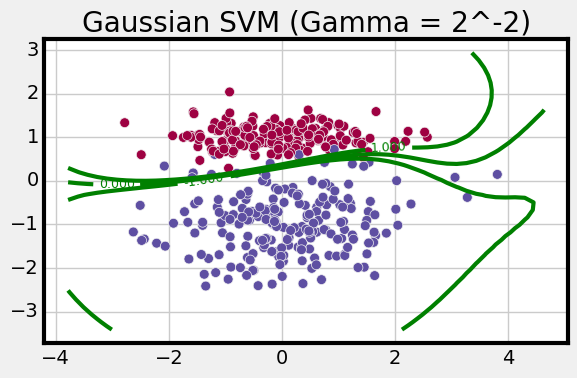

sparsity = 0.025


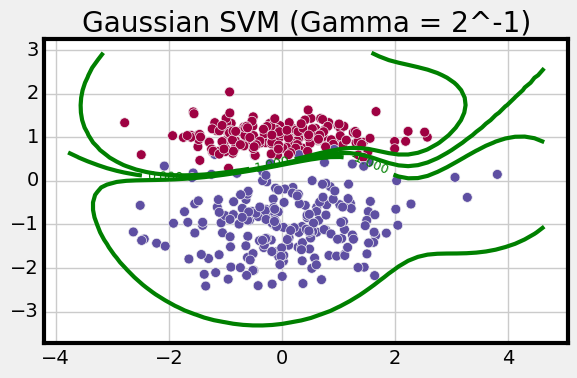

sparsity = 0.0275


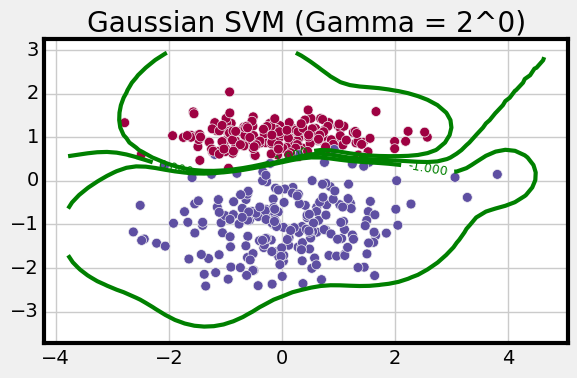

sparsity = 0.04


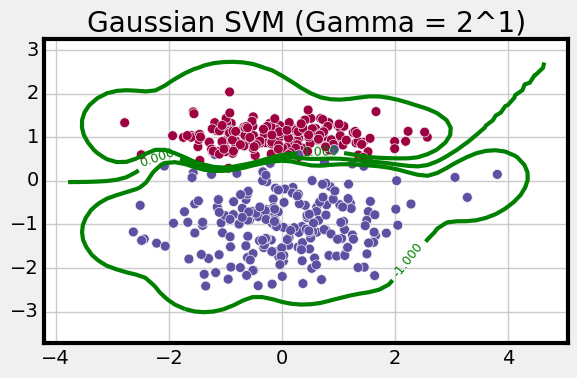

sparsity = 0.0575


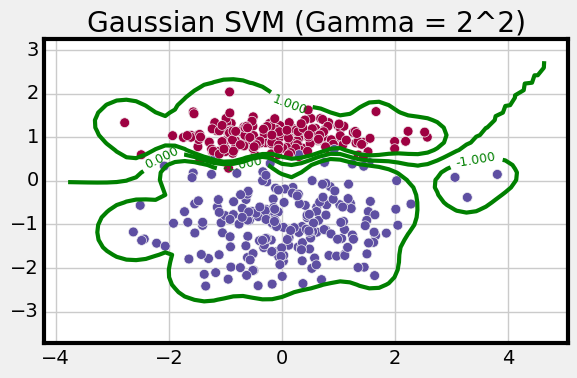

In [10]:
threshold = 1e-4
poss = 2.0**np.array(range(-2,3))
for i, gamma in enumerate(poss):
    alpha, predict_gaussianSVM = run_pegasos(gamma, threshold)
    print 'sparsity =', sum([1.0 if a>0 else 0 for a in alpha])/len(alpha)
    plotDecisionBoundary(X, Y, predict_gaussianSVM, [-1,0,1], title = 'Gaussian SVM (Gamma = 2^'+str(i-2)+')')
    pl.show()

In [4]:
def get_kernel(X, gamma):
    def gauss_kernel(x1, x2):
        v = x1-x2
        return np.exp(-gamma*v.dot(v))
    n = len(X)
    K = np.zeros((n,n))
    for i in range(n):
        for j in range(i+1,n):
            K[i][j] = gauss_kernel(X[i], X[j])
            K[j][i] = K[i][j]
    return K

In [5]:
def gauss_kernel(x1, x2, gamma):
    v = x1-x2
    return np.exp(-gamma*v.dot(v))